In [1]:
# Make sure you are using the cmpi6-2019.10 kernel

# Add ldcpy root to system path (MODIFY FOR YOUR LDCPY CODE LOCATION)
import sys

sys.path.insert(0, '/glade/u/home/abaker/repos/ldcpy')
import ldcpy

# Display output of plots directly in Notebook
%matplotlib inline
# Automatically reload module if it is editted
%reload_ext autoreload
%autoreload 2

# silence warnings
import warnings

warnings.filterwarnings("ignore")

# if you want to use the DASK daskboard on Casper, then modify the below and run
# import dask
# dask.config.set({'distributed.dashboard.link' : 'https://jupyterhub.ucar.edu/dav/user/abaker/proxy/{port}/status'})

# if you want to use the DASK daskboard on Cheyenne, then modify the below and run
import dask

dask.config.set(
    {'distributed.dashboard.link': 'https://jupyterhub.ucar.edu/ch/user/abaker/proxy/{port}/status'}
)

In [2]:
from dask.distributed import Client
# for Cheyenne
from dask_jobqueue import PBSCluster

cluster = PBSCluster(
    queue="regular",
    walltime="02:00:00",
    project="NIOW0001",
    memory="109GB",
    resource_spec="select=1:ncpus=36:mem=109GB",
    cores=36,
    processes=9,
)

# scale as needed
cluster.adapt(minimum_jobs=1, maximum_jobs=35)
cluster

In [3]:
from dask.distributed import Client

# Connect client to the remote dask workers
client = Client(cluster)
client

Client Scheduler: tcp://10.148.11.122:42177 Dashboard: https://jupyterhub.ucar.edu/ch/user/abaker/proxy/8787/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [4]:
# load the first 86 years of PRECT data
col_PRECT = ldcpy.open_datasets(
    ["PRECT"],
    [
        "/glade/p/cisl/asap/ldcpy_sample_data/lens/orig/PRECT.daily.19200101-20051231.nc",
        "/glade/p/cisl/asap/ldcpy_sample_data/lens/lossy/c.PRECT.daily.19200101-20051231.nc",
    ],
    ["orig", "lossy"],
    chunks={"time": 500},
).persist()
col_PRECT

dataset size in GB 13.89



,Array,Chunk
Bytes,13.89 GB,110.59 MB
Shape,"(2, 31390, 192, 288)","(1, 500, 192, 288)"
Count,126 Tasks,126 Chunks
Type,float32,numpy.ndarray


In [6]:
ldcpy.compare_stats(col_PRECT.isel(time=0), "PRECT", "orig", "lossy")

 
mean orig                          : 2.3052e-08
mean lossy                         : 2.3051e-08
mean diff                          : 2.5179e-13
 
variance orig                      : 4.6181e-15
variance lossy                     : 4.618e-15
 
standard deviation orig            : 6.7957e-08
standard deviation lossy           : 6.7956e-08
 
max value orig                     : 1.1832e-06
max value lossy                    : 1.1832e-06
min value orig                     : -5.7434e-22
min value lossy                    : -5.7433e-22
 
max abs diff                       : 2.8422e-11
min abs diff                       : 0
mean abs diff                      : 2.5179e-13
mean squared diff                  : 6.3399e-26
root mean squared diff             : 9.2213e-13
normalized root mean squared diff  : 7.7937e-07
normalized max pointwise error     : 2.4022e-05
pearson correlation coefficient    : 1
ks p-value                         : 0.43983
spatial relative error(% > 0.0001) : 5.1468
max sp

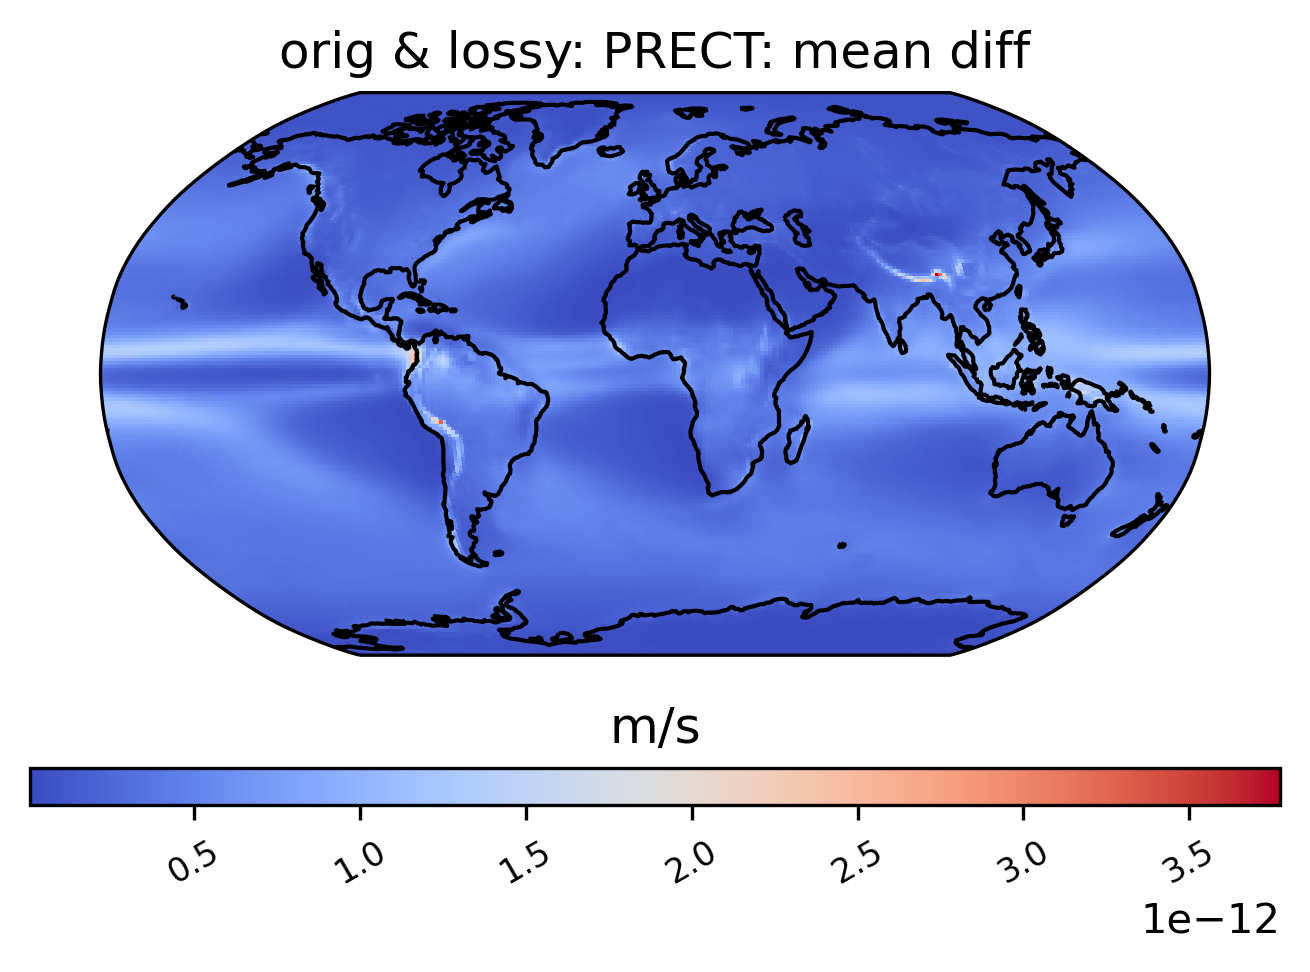

In [7]:
# diff between mean PRECT values across the entire timeseries
ldcpy.plot(
    col_PRECT,
    "PRECT",
    sets=["orig", "lossy"],
    calc="mean",
    calc_type="diff",
)

In [8]:
cluster.close()
client.close()